<a href="https://colab.research.google.com/github/EileenWang-10001010/eye_project/blob/main/feature_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
files = ['/content/drive/MyDrive/Colab Notebooks/parameter_Np_right.txt',
      '/content/drive/MyDrive/Colab Notebooks/parameter_OAG_right.txt', 
      '/content/drive/MyDrive/Colab Notebooks/parameter_ACG_right.txt'
      ]
      # 105 lines, 110 features

#print(files[1].split("_")[-2]) #OAG

In [ ]:
import numpy as np
import pandas as pd
# data = np.array([])
data = []
category = []
data_length = []

for i in range(len(files)):
  f = open(files[i])

  for line in f:
    line = line.split(',')
    # categorical label
    category.append(files[i].split("_")[-2])
    data.append([float(i) for i in line])

  data_length.append(len(data))
  f.close()

print(len(data[0]))
print(data_length) #[15, 63, 105]

data = np.array(data)
# print(type(data), data.shape) # <class 'numpy.ndarray'> (105, 110)

110
[15, 63, 105]


**correlation** **heatmap**

one hot encoding 
https://ithelp.ithome.com.tw/articles/10233484


In [ ]:
label = pd.get_dummies(category)
# type(label)
dataOneHot = np.concatenate((data, label), axis=1)
print(dataOneHot.shape)

(105, 113)


https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(100, 50))
# combination = pd.DataFrame(combination)
# print(combination)
corr=pd.DataFrame(dataOneHot).corr()
# sns.heatmap(corr, annot=True, vmin=0.75)

<Figure size 7200x3600 with 0 Axes>

feature-catergory correlation

In [ ]:
Np_feature = {index: feature for index, feature in enumerate(corr[:][110]) if (feature>0.3 or feature<-0.3)}
OAG_feature = {index: feature for index, feature in enumerate(corr[:][111]) if (feature>0.2 or feature<-0.4)}
ACG_feature = {index: feature for index, feature in enumerate(corr[:][112]) if (feature>0.2 or feature<-0.4)}
print(Np_feature,'\n',OAG_feature,'\n',ACG_feature)

{7: 0.32162724596413544, 23: 0.32323850737255627, 110: 1.0, 111: -0.33333333333333337, 112: -0.7492686492653552} 
 {44: -0.45073988857016595, 56: 0.24277347172020292, 78: 0.23021938190850347, 93: -0.40868821809389183, 111: 1.0} 
 {40: 0.20993983563007523, 88: 0.27155299689332696, 110: -0.7492686492653552, 112: 1.0}


feature-feature correlation

In [ ]:
# f2f={}
# for i in range(corr.shape[0]):
#   f2f[i]={index: feature for index, feature in enumerate(corr[:][i]) if (feature>0.75 or feature<-0.75) and (feature!=1)}
# print(f2f)

**ROC, AUC and data distribution**
https://seaborn.pydata.org/tutorial/distributions.html


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:882: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


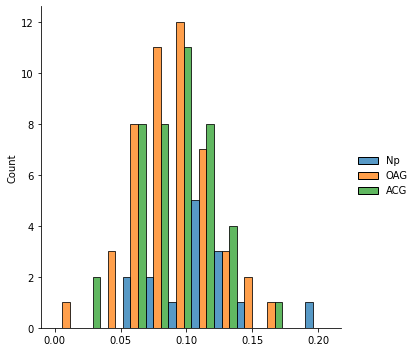

In [ ]:
sns.displot(data, x=data[:,56], hue=category, multiple="dodge")
# sns.displot(data, x=data[:,8], hue=category, kind="kde")

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_Np = label_binarize(category,classes=['Np']) # Np=1, OAG,ACG=0
y_OAG = label_binarize(category,classes=['OAG'])
y_ACG = label_binarize(category,classes=['ACG'])

fpr = dict()
tpr = dict()
roc_auc = dict()

# def roc(x):
#   labelSet =[]
#   for i in range(x.shape[1]):
#     threshold_pt = np.linspace(min(x[:,i]), max(x[:,i]), num=150)
#     for j in range(len(threshold_pt)):
#       for k in range(x.shape[0]):
#         if x[k,i] < threshold_pt[j]:
#           labelSet.append(0)
#         else:
#           labelSet.append(1)
#   labelSet = np.array(labelSet)
#   labelSet=np.reshape(labelSet, (x.shape[0],len(threshold_pt),x.shape[1]))
#   return labelSet

# y_pred = roc(data) #105,150,110

for i in range(data.shape[1]):
  fpr[i], tpr[i], thresholds = roc_curve(y_Np, data[:,i]) #thresholds=24
  roc_auc[i] = auc(fpr[i], tpr[i])

max_roc_auc = {index: auc for (index, auc) in roc_auc.items() if auc>0.65}

# print(max(roc_auc, key=roc_auc.get))
print(max_roc_auc)

{0: 0.6562962962962964, 43: 0.6603703703703705, 56: 0.6725925925925926}


https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
https://ithelp.ithome.com.tw/articles/10197461


Cramer's V correlation
https://www.statology.org/cramers-v-in-python/

Oridinal encoding

In [ ]:
# y_Np = label_binarize(category,classes=['Np']) # Np=1, OAG,ACG=0
ordinal_Np = np.concatenate((data, y_Np), axis=1)
ordinal_corr = pd.DataFrame(label).corr(method = 'pearson')
fig = plt.figure(figsize=(100, 50))
# sns.heatmap(ordinal_corr)
ordinal_max = {index: feature for index, feature in enumerate(corr[:][111]) if (feature>0.4 or feature<-0.4)}
print(ordinal_max)

{44: -0.45073988857016595, 93: -0.40868821809389183, 111: 1.0}


<Figure size 7200x3600 with 0 Axes>

In [ ]:
ordinal_label = [3] * data_length[0] + [2] * (data_length[1]-data_length[0]) + [1] * (data_length[2]-data_length[1])
ordinal_corr = pd.DataFrame(label).corr(method = 'pearson')
ordinal_max = {index: feature for index, feature in enumerate(corr[:][111]) if (feature>0.4 or feature<-0.4)}
print(ordinal_max)

{44: -0.45073988857016595, 93: -0.40868821809389183, 111: 1.0}


forward selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# n=1 # 10 s

sfs = SFS(LogisticRegression(),
          n_features_to_select = 9, #tuning
          direction= 'forward',
          scoring = 'roc_auc',
          )
# default :　5-fold cross validation

clf = LogisticRegression(max_iter=2500,penalty='l2', C=0.1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# training data fits logistic regression
sfs.fit(X_train, y_train)

# training data transformed to fewer features
forward_tr = sfs.transform(X_train)

print("training data shape: ",forward_tr.shape)

# 選出的 feature index
idx = np.where(sfs.get_support())
# idx = map(lambda x: x+1,idx)

print("feature selected: ", idx)
# 57, 22, 93, (12, 2, 1, 3, 5, 25, 29)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# n=1 # 10 s

sfs = SFS(LogisticRegression(),
          n_features_to_select = 9, #tuning
          direction= 'forward',
          scoring = 'roc_auc',
          )
# default :　5-fold cross validation

clf = LogisticRegression(max_iter=2500,penalty='l2', C=0.1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# training data fits logistic regression
sfs.fit(X_train, y_train)

# training data transformed to fewer features
forward_tr = sfs.transform(X_train)

print("training data shape: ",forward_tr.shape)

# 選出的 feature index
idx = np.where(sfs.get_support())
# idx = map(lambda x: x+1,idx)

print("feature selected: ", idx)
# 57, 22, 93, (12, 2, 1, 3, 5, 25, 29)